In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv("smsspamcollection (1).tsv",sep="\t")

In [11]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [12]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [13]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [14]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [15]:
#Balancing Data
ham=df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [16]:
spam=df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [17]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [18]:
spam.shape[0]

747

In [19]:
ham=ham.sample(spam.shape[0]) #ques

In [20]:
ham.shape

(747, 4)

In [21]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [22]:
data = pd.concat([ham,spam],ignore_index=True)

In [23]:
data.shape

(1494, 4)

In [24]:
data

,label,message,length,punct
0,ham,7 wonders in My WORLD 7th You 6th Ur style 5th...,151,5
1,ham,Hey you told your name to gautham ah?,37,1
2,ham,PICK UR FONE UP NOW U DUMB?,27,1
3,ham,No i am not having not any movies in my laptop,46,0
4,ham,Its ok..come to my home it vl nice to meet and...,59,4
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


(array([ 7.,  8.,  9., 12., 55., 76., 54., 59., 47., 30., 40., 31., 30.,
        21., 22., 18., 15., 22., 12., 12.,  9., 16., 12., 12.,  8., 14.,
        10., 12.,  6.,  6.,  7., 12., 15.,  5.,  0.,  0.,  2.,  1.,  1.,
         1.,  2.,  3.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([  2. ,   6.8,  11.6,  16.4,  21.2,  26. ,  30.8,  35.6,  40.4,
         45.2,  50. ,  54.8,  59.6,  64.4,  69.2,  74. ,  78.8,  83.6,
         88.4,  93.2,  98. , 102.8, 107.6, 112.4, 117.2, 122. , 126.8,
        131.6, 136.4, 141.2, 146. , 150.8, 155.6, 160.4, 165.2, 170. ,
        174.8, 179.6, 184.4, 189.2, 194. , 198.8, 203.6, 208.4, 213.2,
        218. , 222.8, 227.6, 232.4, 237.2, 242. , 246.8, 251.6, 256.4,
        

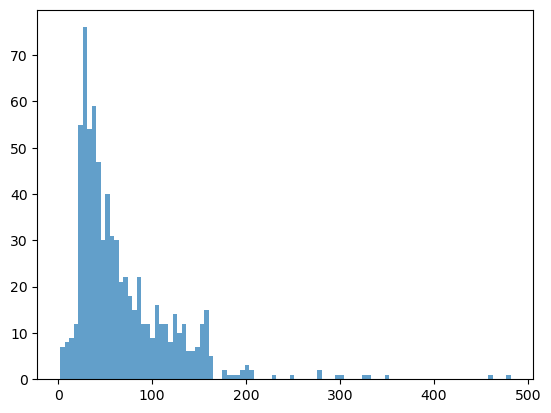

In [25]:
#Data Visualization
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)

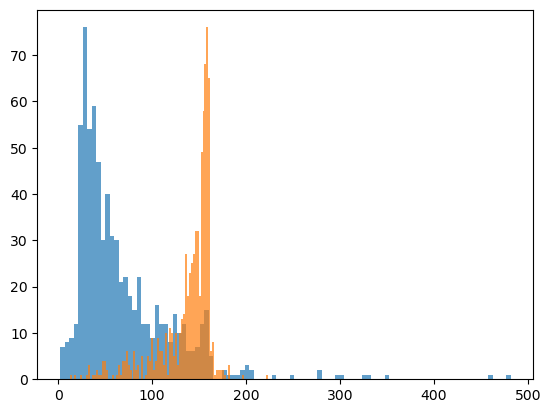

In [26]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

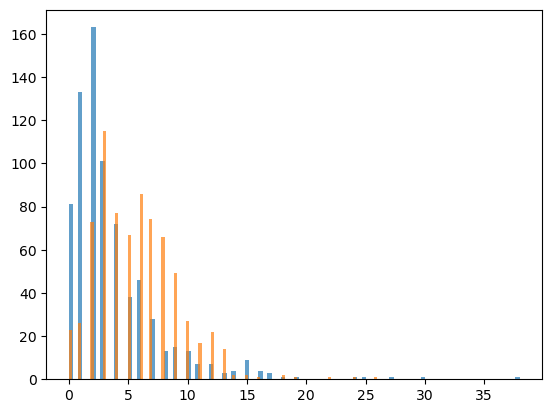

In [27]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

In [28]:
#train test
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.3,random_state=42)

In [30]:
#building the model
from sklearn.pipeline import Pipeline

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [32]:
classifier=Pipeline([('tfidf',TfidfVectorizer()),('classifier',RandomForestClassifier(n_estimators=100))])

In [33]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

Predicting the result

In [34]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [35]:
y_pred=classifier.predict(x_test)

In [36]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[216,   1],
       [ 23, 209]], dtype=int64)

In [37]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       217
        spam       1.00      0.90      0.95       232

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [38]:
accuracy_score(y_test,y_pred)

0.9465478841870824

In [39]:
#PREDICT a real message
classifier.predict(['Hello,you are learning natural processing language'])

array(['ham'], dtype=object)